# Interdisciplinarity

In [1]:
from constants import all_topics_names, folder_meicogsci, folder_meicogsci_2019, folder_models
from helping_functions import get_topics_for_abstract
import matplotlib.pyplot as plt
import collections
import statistics
import networkx
import gensim
import pandas
import nltk
import os

In [2]:
# initializing lem for lemmatization with preprocessing
lem = nltk.stem.WordNetLemmatizer()

In [3]:
# getting the list of all files with abstracts
all_files = os.listdir(folder_meicogsci)
all_files_2019 = os.listdir(folder_meicogsci_2019)

In [4]:
# importing the model
model_21 = gensim.models.LdaModel.load(os.path.join(folder_models, "LDA_21"))
model_21.minimum_probability = 0.0

In [5]:
# calculate the topics for each abstract
all_files_by_topic = []
for filename in all_files:
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci, filename, model_21, lem))
for filename in all_files_2019:
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci_2019, filename, model_21, lem))

In [6]:
threshold = 0.1

In [7]:
# here I am counting the number of abstracts with each topic
topic_article_number = collections.defaultdict(int)
for abstract in all_files_by_topic:
    for i1, topic1 in enumerate(abstract[:-2]):
        if topic1 > threshold:
            topic_article_number[i1] += 1

In [8]:
# here I am seeing, which topics appear together
connections = collections.defaultdict(dict)
for abstract in all_files_by_topic:
    for i1, topic1 in enumerate(abstract[:-2]):
        for i2, topic2 in enumerate(abstract[:-2]):
            if i1 > i2:
                if topic1 > threshold and topic2 > threshold:
                    try:
                        connections[i1][i2] += 1
                    except KeyError:
                        connections[i1][i2] = 1

In [9]:
# here I am just changing things to frequencies for easier calculation later
topic_article_freq = {topic: count/len(all_files) for topic, count in topic_article_number.items()}

In [10]:
# here I am just changing things to frequencies for easier calculation later
connections_freq = collections.defaultdict(dict)
for topic1 in connections:
    for topic2 in connections[topic1]:
        connections_freq[topic1][topic2] = connections[topic1][topic2]/len(all_files)

In [11]:
# here I am calculating if two topics appear more together than expected or less
all_connections = []
for topic1 in connections_freq:
    for topic2 in connections_freq[topic1]:
        real = connections_freq[topic1][topic2]
        expected = topic_article_freq[topic1] * topic_article_freq[topic2]
        all_connections.append([all_topics_names[topic1], all_topics_names[topic2], real, expected, real-expected])

Here is the list of topics that appear togehter less frequently than we would expect based on their frequency. 

In [12]:
pandas.DataFrame(all_connections, columns=["Topic1", "Topic2", "Real", "Expected", "Score"]).sort_values(by="Score").head(5)

,Topic1,Topic2,Real,Expected,Score
79,constructivism,neuroscience,0.037634,0.083754,-0.046120
145,neuroscience,society,0.021505,0.064998,-0.043493
148,neuroscience,decision making,0.020161,0.058854,-0.038693
113,perception,constructivism,0.032258,0.064570,-0.032312
103,language,neuroscience,0.017473,0.045596,-0.028123


And here is the list of topics that appear together more frequently than we would expect based on their frequency. 

In [13]:
pandas.DataFrame(all_connections, columns=["Topic1", "Topic2", "Real", "Expected", "Score"]).sort_values(by="Score", ascending=False).head(5)

,Topic1,Topic2,Real,Expected,Score
57,TMS,neuroscience,0.060484,0.029427,0.031057
36,tasks,decision making,0.047043,0.027290,0.019753
72,constructivism,society,0.112903,0.094048,0.018855
164,reinforcment learning,neural networks,0.033602,0.018021,0.015582
161,reinforcment learning,modeling,0.040323,0.025057,0.015265


Here the calculations can be seen for each topic with one specific topic. Here I choose constructivism and decision making. 

In [14]:
pandas.DataFrame([[t1, t2, r, e, s] for t1, t2, r, e, s in all_connections if t1 == "decision making" or t2 == "decision making"], columns=["Topic1", "Topic2", "Real", "Expected", "Score"]).sort_values(by="Score", ascending=False)

,Topic1,Topic2,Real,Expected,Score
3,tasks,decision making,0.047043,0.027290,0.019753
5,decision making,society,0.072581,0.066088,0.006493
2,learning,decision making,0.068548,0.065430,0.003118
18,system,decision making,0.017473,0.020057,-0.002583
0,non-typical,decision making,0.030914,0.033537,-0.002623
10,constructivism,decision making,0.081989,0.085158,-0.003169
6,decision making,categorization,0.010753,0.015453,-0.004701
17,reinforcment learning,decision making,0.025538,0.031236,-0.005698
19,health,decision making,0.006720,0.013481,-0.006760
7,decision making,modeling,0.038978,0.048004,-0.009026


In [15]:
pandas.DataFrame([[t1, t2, r, e, s] for t1, t2, r, e, s in all_connections if t1 == "constructivism" or t2 == "constructivism"], columns=["Topic1", "Topic2", "Real", "Expected", "Score"]).sort_values(by="Score", ascending=False)

,Topic1,Topic2,Real,Expected,Score
4,constructivism,society,0.112903,0.094048,0.018855
9,constructivism,categorization,0.022849,0.021991,0.000858
12,reasoning,constructivism,0.040323,0.040707,-0.000385
16,verbalization,constructivism,0.024194,0.024799,-0.000605
10,constructivism,modeling,0.065860,0.068314,-0.002453
19,health,constructivism,0.016129,0.019184,-0.003055
5,constructivism,decision making,0.081989,0.085158,-0.003169
8,constructivism,movement,0.044355,0.048194,-0.003839
18,system,constructivism,0.021505,0.028542,-0.007037
0,attention,constructivism,0.026882,0.034625,-0.007743


In [16]:
# here I am getting the data in a state, where I could compare by year
topic_article_number_by_year = collections.defaultdict(dict)
article_by_year = collections.defaultdict(int)
for abstract in all_files_by_topic:
    year = abstract[-2].split("_")[1]
    article_by_year[year] += 1
    for i1, topic1 in enumerate(abstract[:-2]):
        if topic1 > threshold:
            try:
                topic_article_number_by_year[year][i1] += 1
            except KeyError:
                topic_article_number_by_year[year][i1] = 1

In [17]:
# here I am changing the data to frequencies
topic_article_number_by_year_freq = dict()
for year, data in topic_article_number_by_year.items():
    article_current_year = article_by_year[year]
    data_freq = dict()
    for topic, count in data.items():
        data_freq[topic] = count/article_current_year
    topic_article_number_by_year_freq[year] = data_freq

In [18]:
# here I am not calculating the connections between topics by year
connections_by_year = dict()
for year in range(2008, 2020):
    connections_by_year[year] = collections.defaultdict(dict)
for abstract in all_files_by_topic:
    year = int(abstract[-2].split("_")[1])
    for i1, topic1 in enumerate(abstract[:-2]):
        for i2, topic2 in enumerate(abstract[:-2]):
            if i1 > i2:
                if topic1 > threshold and topic2 > threshold:
                    try:
                        connections_by_year[year][i1][i2] += 1
                    except KeyError:
                        connections_by_year[year][i1][i2] = 1

In [19]:
# here I am now scoring the connection by year
all_scores_by_year = []
for year, data_year in topic_article_number_by_year_freq.items():
    for topic1 in data_year:
        for topic2 in data_year:
            if topic1 > topic2:
                expected = data_year[topic1] * data_year[topic2]
                try:
                    real = connections_by_year[int(year)][topic1][topic2] / article_by_year[year]
                except KeyError:
                    real = 0
                score = real - expected
                all_scores_by_year.append([int(year), all_topics_names[topic1], all_topics_names[topic2], expected, real, score])

In [20]:
# and here I am putting it in pandas
all_scores_by_year_pandas = pandas.DataFrame(all_scores_by_year, columns=["Year", "Topic1", "Topic2", "Expected", "Real", "Score"]).sort_values("Score")

And here I can now see how the interdisciplinarity of two subjects changed through time. Let us start with neuroscience and decision making.

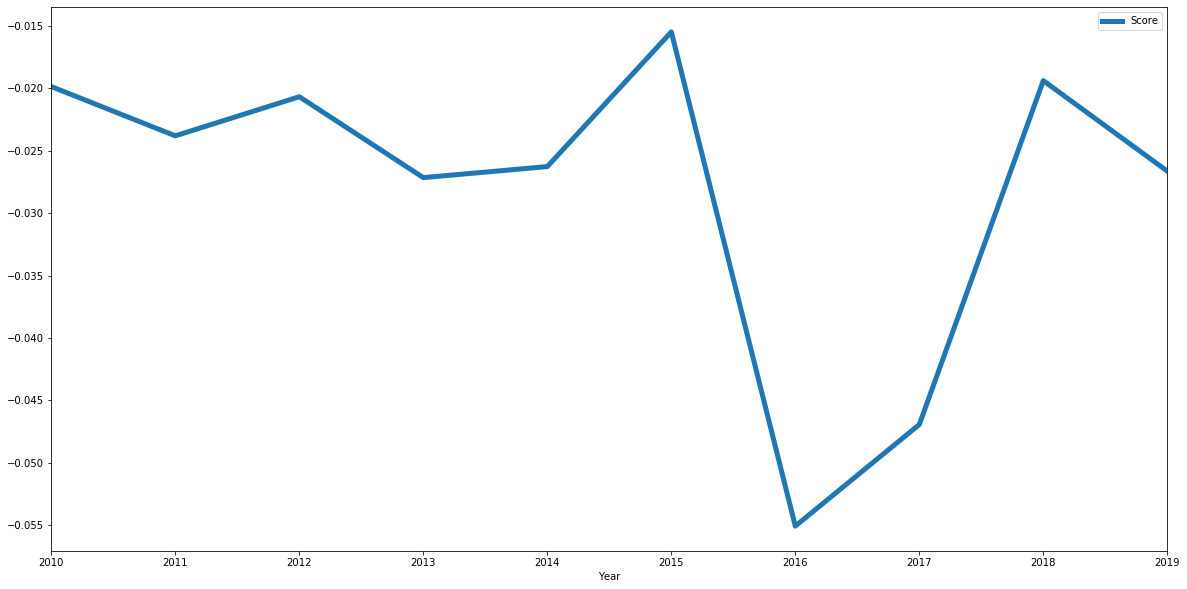

In [21]:
all_scores_by_year_pandas[(all_scores_by_year_pandas.Topic1 == "neuroscience") & (all_scores_by_year_pandas.Topic2 == "decision making")].sort_values(by="Year")[["Year", "Score"]].plot(x="Year", y="Score", figsize=(20, 10), linewidth=5)

Or costructivism and neuroscience. 

In [22]:
all_scores_by_year_pandas[(all_scores_by_year_pandas.Topic1 == "constructivism") & (all_scores_by_year_pandas.Topic2 == "neuroscience")].sort_values(by="Year")

,Year,Topic1,Topic2,Expected,Real,Score
1619,2010,constructivism,neuroscience,0.036389,0.021739,-0.014650
831,2011,constructivism,neuroscience,0.032124,0.024390,-0.007733
1704,2012,constructivism,neuroscience,0.041781,0.015152,-0.026630
243,2013,constructivism,neuroscience,0.060096,0.036145,-0.023951
29,2014,constructivism,neuroscience,0.064765,0.044944,-0.019821
453,2015,constructivism,neuroscience,0.045599,0.026786,-0.018814
689,2016,constructivism,neuroscience,0.057670,0.019608,-0.038062
1224,2017,constructivism,neuroscience,0.091521,0.040404,-0.051117
1022,2018,constructivism,neuroscience,0.079029,0.045455,-0.033574
1971,2019,constructivism,neuroscience,0.110947,0.048077,-0.062870


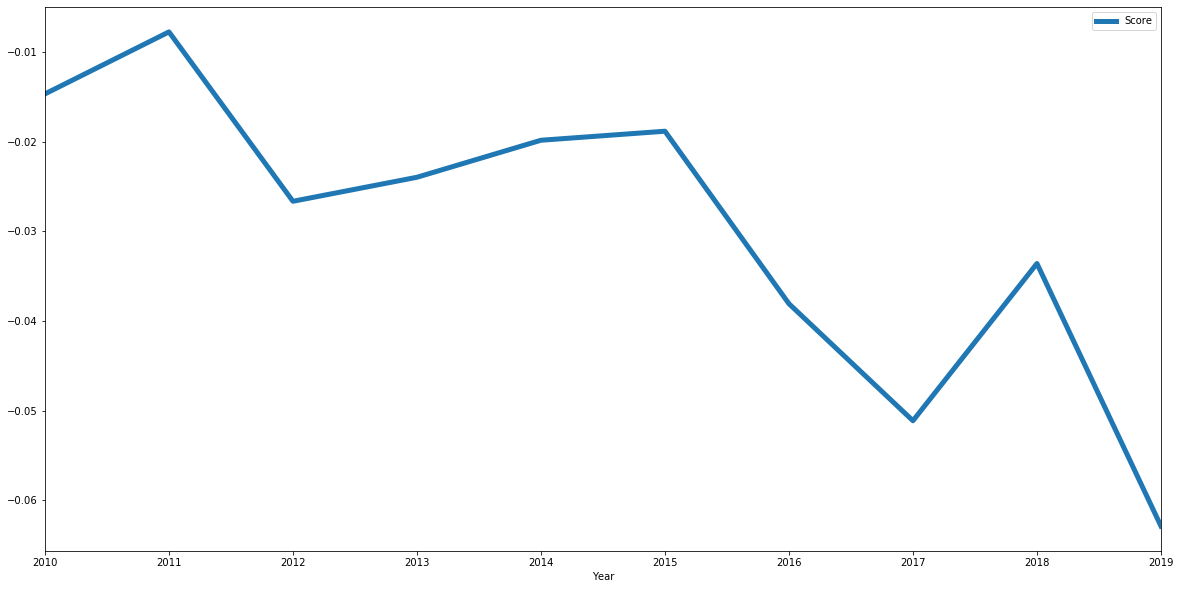

In [23]:
all_scores_by_year_pandas[(all_scores_by_year_pandas.Topic1 == "constructivism") & (all_scores_by_year_pandas.Topic2 == "neuroscience")].sort_values(by="Year")[["Year", "Score"]].plot(x="Year", y="Score", figsize=(20, 10), linewidth=5)

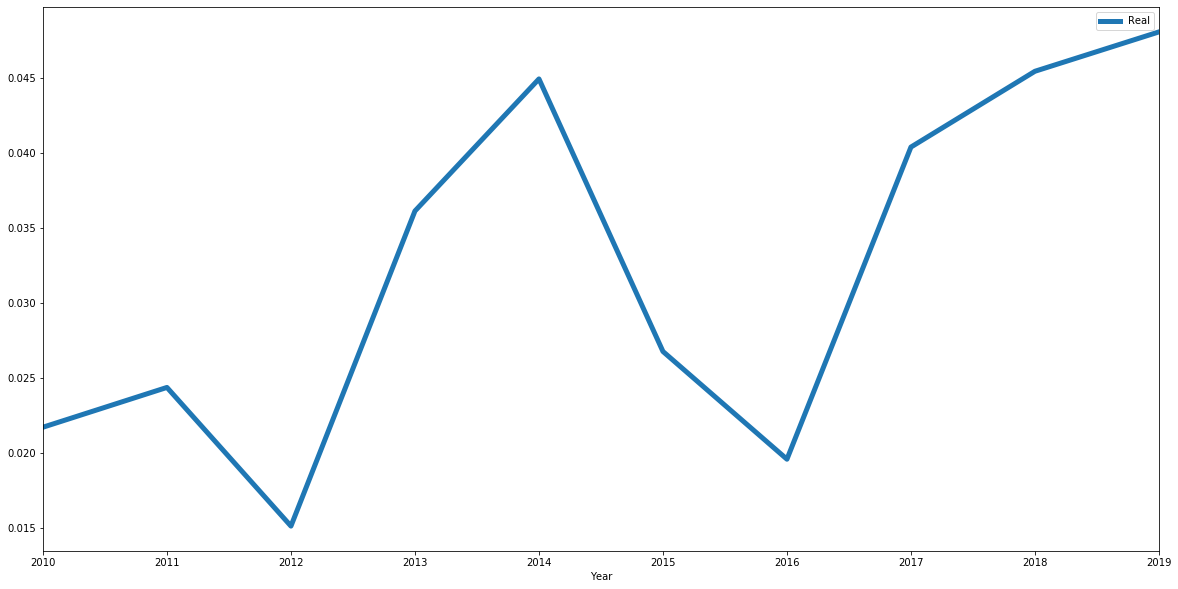

In [24]:
all_scores_by_year_pandas[(all_scores_by_year_pandas.Topic1 == "constructivism") & (all_scores_by_year_pandas.Topic2 == "neuroscience")].sort_values(by="Year")[["Year", "Real"]].plot(x="Year", y="Real", figsize=(20, 10), linewidth=5)

In [25]:
# next I can calculate how many topic each article has
articles_by_topic_numbers = collections.defaultdict(int)
for abstract in all_files_by_topic:
    number_of_topics = len([t for t in abstract[:-2] if t > 0.1])
    articles_by_topic_numbers[number_of_topics] += 1

In [26]:
# and then I can count the number of articles with each number of topics
all_topics = 0
all_articles = 0
for group in articles_by_topic_numbers:
    all_topics += int(group) * articles_by_topic_numbers[group]
    all_articles += articles_by_topic_numbers[group]

In [27]:
#then I can calculate how many topics does the article has on avreage
all_topics / all_articles

2.890330188679245

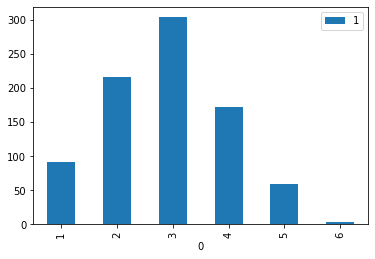

In [28]:
#or I can see the distribution of number of articles with each number of topics
pandas.DataFrame([[number, count] for number, count in articles_by_topic_numbers.items()]).sort_values(by=0).plot(kind="bar", x=0, y=1)

In [29]:
# I can also calculate, how the avreage number of topics changed through the year
articles_by_topic_numbers_by_year = collections.defaultdict(list)
for abstract in all_files_by_topic:
    number_of_topics = len([t for t in abstract[:-2] if t > 0.1])
    year = abstract[-2].split("_")[1]
    articles_by_topic_numbers_by_year[year].append(number_of_topics)

In [30]:
# results of the avreage number of topic in an article each year
pandas.DataFrame([[year, statistics.mean(values)] for year, values in articles_by_topic_numbers_by_year.items()]).sort_values(by=0)

,0,1
9,2008,2.625000
10,2009,2.000000
7,2010,2.652174
4,2011,2.463415
8,2012,2.606061
1,2013,2.819277
0,2014,2.797753
2,2015,2.723214
3,2016,2.803922
6,2017,3.010101


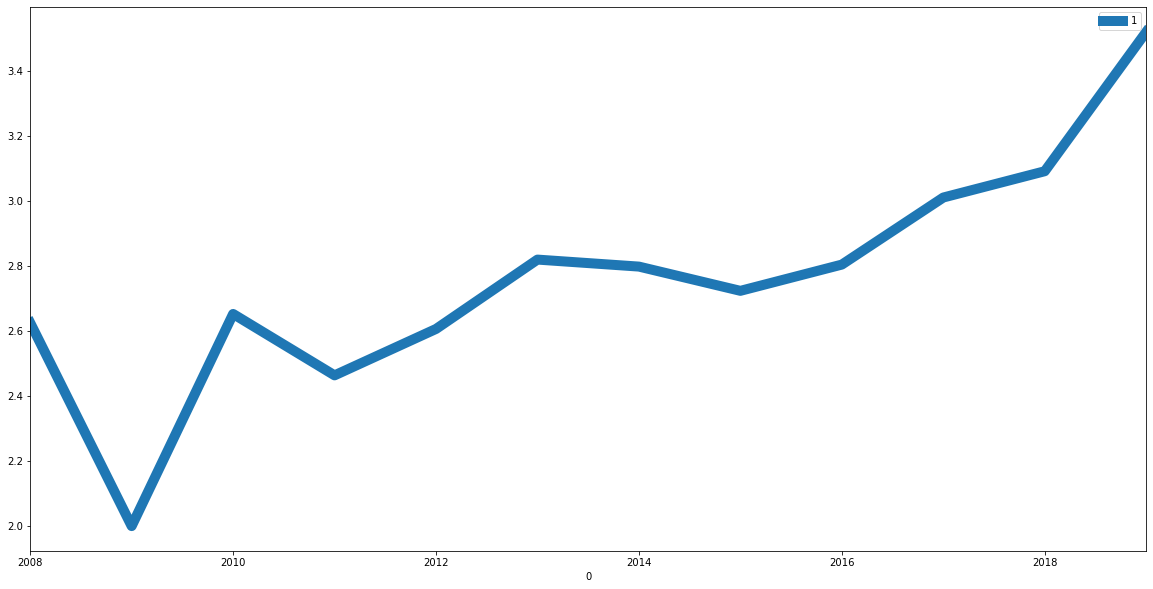

In [32]:
# and here is the graph of avreage number of topics per year
pandas.DataFrame([[year, statistics.mean(values)] for year, values in articles_by_topic_numbers_by_year.items()]).sort_values(by=0).plot(x=0, y=1, figsize=(20,10), linewidth=10)